In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('ticks')
import numpy as np
import scipy.integrate as integ
from astropy.io import ascii
#from scipy import interpolate
#import scipy.stats as stats
#from astropy.table import Table, Column
#import readsnap as rs
#reload(rs)

plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 15

# CGS
G = 6.6726e-08 # [G]=cm^3 g^-1 s^-2
Ro = 6.96e10
Mo = 1.99e33
c = 2.9979e+10
day = 60*60*24

In [3]:
def readDataHeger(filename):
    # Alejandro - 16/06/2020
    # Values taken from Aldo's script. Double check.
    data = np.genfromtxt(filename)
    m = data[:,1] # cell outer total mass
    r = data[:,2] # cell outer radius
    v = data[:,3] # cell outer velocity
    rho = data[:,4] # cell density
    Omega = data[:,9] #5*s26_data[:,9] # cell specific angular momentum
    jprofile = (2./3.)*Omega*r**2
    T = data[:,5] # cell temperature
    p = data[:,6] # cell pressure
    e = data[:,7] # cell specific energy
    S = data[:,8] # cell specific entropy
    
    return m,r,v,rho,Omega,jprofile,T,p,e,S

In [4]:
def calculateBindingEnergy(m,r):
    Min = m[::-1]
    rin = r[::-1]
    E_bind = integ.cumtrapz(-G*Min/rin,Min)
    E_bind = E_bind[::-1]
    E_bind = np.append(E_bind,E_bind[-1])
    
    return E_bind

In [5]:
# Load Alex's models
mHE16C,rHE16C,vHE16C,rhoHE16C,OmegaHE16C,jprofileHE16C,THE16C,pHE16C,eHE16C,SHE16C = readDataHeger('../stellarProfiles/HE16C@presn')
m12SH,r12SH,v12SH,rho12SH,Omega12SH,jprofile12SH,T12SH,p12SH,e12SH,S12SH = readDataHeger('../stellarProfiles/12SH@presn')
m12SF,r12SF,v12SF,rho12SF,Omega12SF,jprofile12SF,T12SF,p12SF,e12SF,S12SF = readDataHeger('../stellarProfiles/12SF@presn')

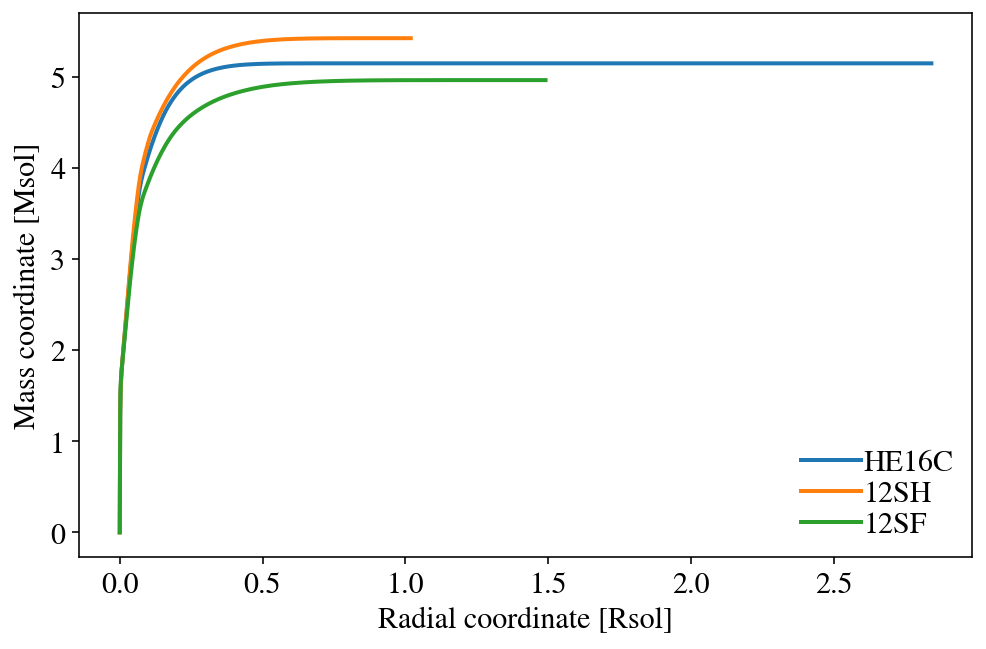

In [6]:
plt.plot(rHE16C/Ro,mHE16C/Mo)
plt.plot(r12SH/Ro,m12SH/Mo)
plt.plot(r12SF/Ro,m12SF/Mo)
plt.xlabel("Radial coordinate [Rsol]")
plt.ylabel("Mass coordinate [Msol]")
plt.legend(("HE16C","12SH","12SF"))
#plt.semilogx()

[]

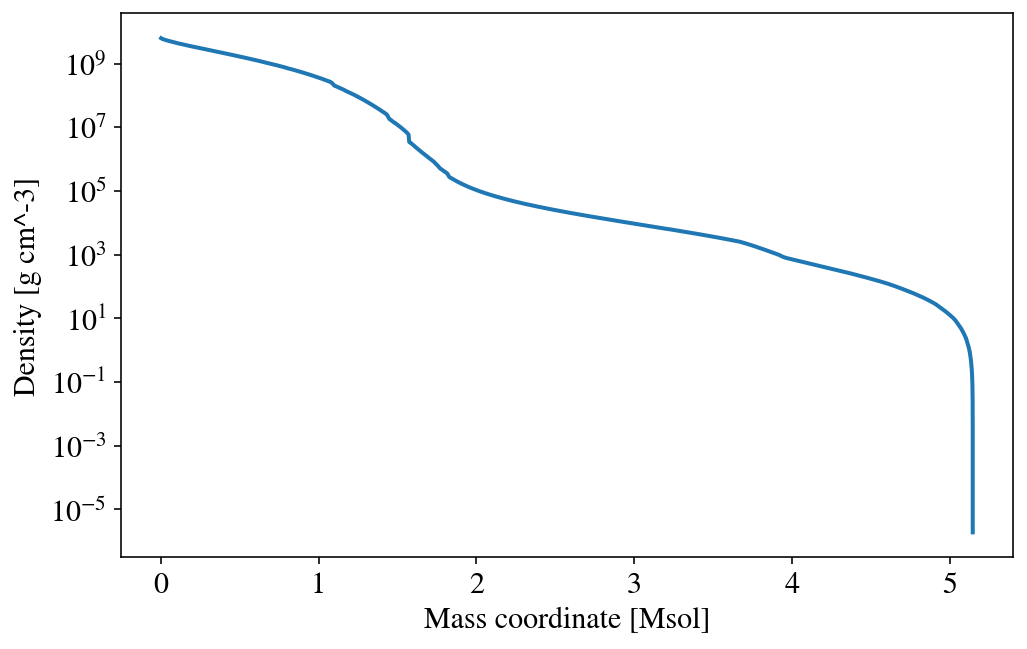

In [6]:
plt.plot(mHE16C/Mo,rhoHE16C)
# plt.plot(m12SH/Mo,rho12SH)
# plt.plot(m12SF/Mo,rho12SF)
plt.ylabel("Density [g cm^-3]")
plt.xlabel("Mass coordinate [Msol]")
plt.semilogy()

[]

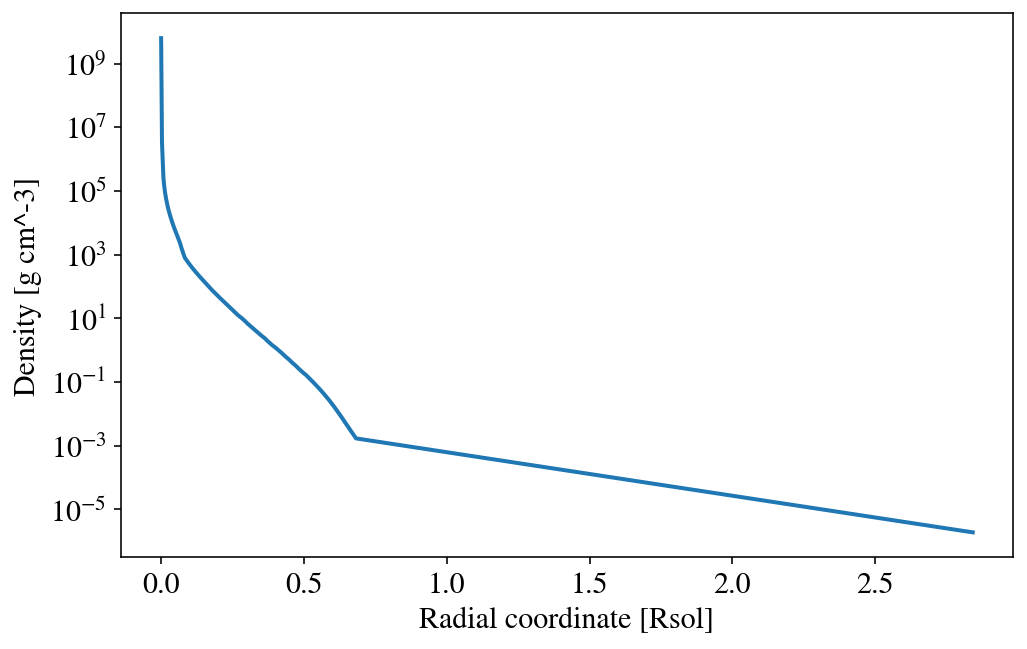

In [7]:
plt.plot(rHE16C/Ro,rhoHE16C)
plt.ylabel("Density [g cm^-3]")
plt.xlabel("Radial coordinate [Rsol]")
plt.semilogy()

In [8]:
E_bindHE16C = calculateBindingEnergy(mHE16C,rHE16C)
E_bind12SH = calculateBindingEnergy(m12SH,r12SH)
E_bind12SF = calculateBindingEnergy(m12SF,r12SF)

(1e+49, 1e+52)

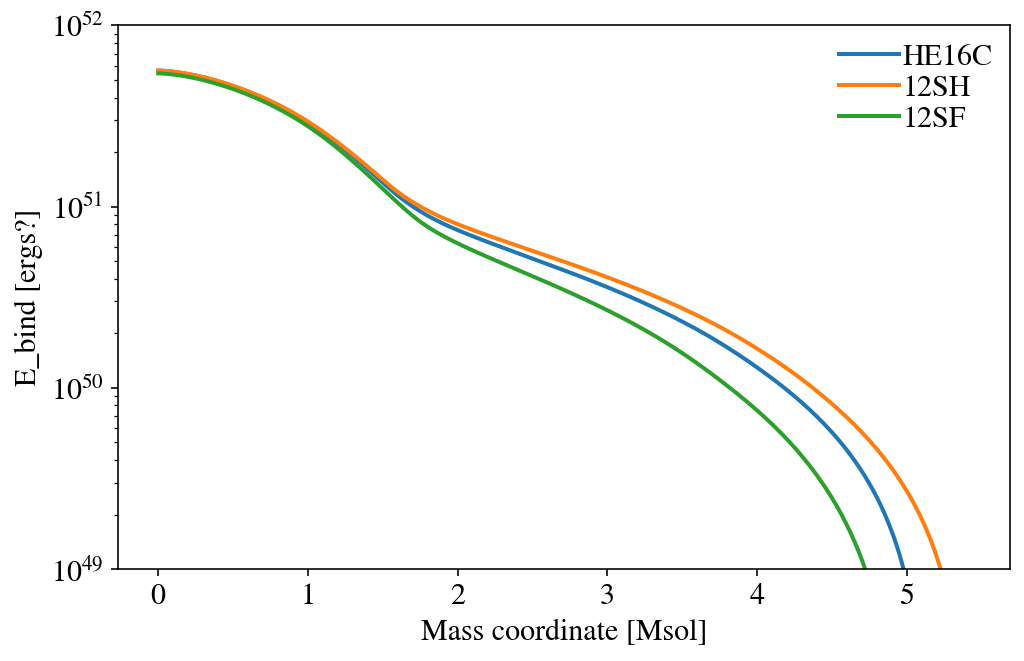

In [11]:
plt.plot(mHE16C/Mo,E_bindHE16C)
plt.plot(m12SH/Mo,E_bind12SH)
plt.plot(m12SF/Mo,E_bind12SF)
plt.ylabel("E_bind [ergs?]")
plt.xlabel("Mass coordinate [Msol]")
plt.legend(("HE16C","12SH","12SF"))
plt.semilogy()
plt.ylim(1e49,1e52)

In [12]:
pwd

'/Users/alejandro/DARK/Projects/hydro_Sophie/peanutShapedSupernova/Scripts'